In [45]:
# Import dependencies. 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  

In [46]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [47]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [48]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [50]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

illoqqortoormiut gl
dikson ru
castro cl
tsihombe mg
namibe ao
nalgonda in
oranjestad an
sorvag fo
port alfred za
mahibadhoo mv
hilo us
vaitupu wf
ushuaia ar
victoria sc
kapaa us
busselton au
broome au
humaita br
port alfred za
george za
saint-philippe re
norman wells ca
ushuaia ar
dikson ru
hami cn
bathsheba bb
thinadhoo mv
esperance au
kapaa us
ostrovnoy ru
brae gb
saqqez ir
ushuaia ar
umm lajj sa
port-gentil ga
hobart au
mar del plata ar
tuktoyaktuk ca
mataura pf
grand gaube mu
mataura pf
altamira br
corrales pe
mataura pf
norman wells ca
upernavik gl
punta arenas cl
hilo us
ushuaia ar
yellowknife ca
te anau nz
taolanaro mg
rikitea pf
bodden town ky
kapaa us
razole in
san-pedro ci
punta arenas cl
bengkulu id
balkanabat tm
saleaula ws
bluff nz
reus es
zwedru lr
coueron fr
carnarvon au
ahipara nz
ushuaia ar
saint-philippe re
chuy uy
illoqqortoormiut gl
newark us
hobart au
fevralsk ru
aripuana br
codrington ag
srednekolymsk ru
ilulissat gl
saskylakh ru
new norfolk au
ushuaia ar
punta ar

In [51]:
# Create a list for holding the cities 
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [52]:
# Import dependencies and initiatize counters and an empty list that will hold the weather data. 

from datetime import datetime
# Import the requests library. 
import requests
# Import the API key.
from config import weather_api_key

# Empty list to hold the weather data
city_data=[]

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [53]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d3866c3d6e5aa688198ae7844c10ea9e


In [54]:
# Loop through the cities list. 
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count. 
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Set 4 | barrow
Processing Record 31 of Set 4 | buritizeiro
Processing Record 32 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 33 of Set 4 | thompson
Processing Record 34 of Set 4 | avarua
Processing Record 35 of Set 4 | oksfjord
Processing Record 36 of Set 4 | tasiilaq
Processing Record 37 of Set 4 | thaton
Processing Record 38 of Set 4 | basco
Processing Record 39 of Set 4 | liniere
City not found. Skipping...
Processing Record 40 of Set 4 | walvis bay
Processing Record 41 of Set 4 | harper
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | neiafu
Processing Record 44 of Set 4 | bubaque
Processing Record 45 of Set 4 | manitouwadge
Processing Record 46 of Set 4 | lampazos de naranjo
Processing Record 47 of Set 4 | ust-barguzin
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | karonga
Processing Record 50 of Set 4 | sur
Processing Record 1 of Set 5 | eirunepe
Processing Record 2 of Se

In [55]:
# Convert the array of dictionaries to a Pandas DataFra
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,-14.57,90,77,8.97,RU,2020-12-28 07:26:33
1,Castro,-24.79,-50.01,62.78,98,82,5.48,BR,2020-12-28 07:26:34
2,Namibe,-15.20,12.15,72.19,73,98,4.36,AO,2020-12-28 07:26:34
3,Nalgonda,17.05,79.27,82.56,37,0,6.49,IN,2020-12-28 07:26:34
4,Oranjestad,12.52,-70.03,78.80,78,20,10.29,AW,2020-12-28 07:26:35
5,Port Alfred,-33.59,26.89,72.00,83,87,5.01,ZA,2020-12-28 07:26:35
6,Mahibadhoo,3.78,72.97,82.60,65,0,7.09,MV,2020-12-28 07:26:35
7,Hilo,19.73,-155.09,69.80,83,75,6.93,US,2020-12-28 07:26:35
8,Ushuaia,-54.80,-68.30,44.60,81,40,11.41,AR,2020-12-28 07:26:36
9,Victoria,22.29,114.16,78.80,39,0,21.92,HK,2020-12-28 07:24:37


In [56]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
560,Meulaboh,ID,2020-12-28 07:28:11,4.14,96.13,82.20,77,100,7.02
561,Miri,MY,2020-12-28 07:28:11,4.41,114.01,86.00,74,40,8.05
562,Carahue,CL,2020-12-28 07:28:11,-38.70,-73.17,55.40,100,90,1.12
563,Mount Pleasant,US,2020-12-28 07:23:16,32.79,-79.86,37.40,100,1,5.59
564,Koumac,NC,2020-12-28 07:28:11,-20.57,164.28,80.20,76,16,6.73
565,Xapuri,BR,2020-12-28 07:28:11,-10.65,-68.50,70.66,98,100,1.21
566,Vila Velha,BR,2020-12-28 07:28:11,-20.33,-40.29,71.60,94,0,3.36
567,Ongandjera,NA,2020-12-28 07:28:12,-17.88,15.07,75.56,64,100,2.30
568,Chkalovskoye,RU,2020-12-28 07:28:12,44.84,133.04,0.09,87,100,2.71
569,Acajutla,SV,2020-12-28 07:28:12,13.59,-89.83,61.00,98,100,8.48


In [57]:
# Create the output file (CSV). 
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [58]:
city_data_df["Max Temp"].describe()

count    570.000000
mean      52.892982
std       31.079556
min      -40.900000
25%       35.600000
50%       62.690000
75%       76.995000
max       97.520000
Name: Max Temp, dtype: float64

In [59]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

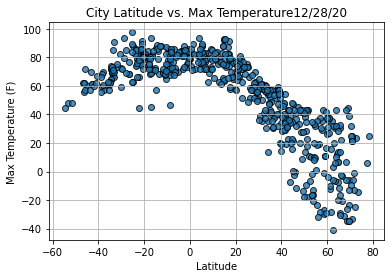

In [60]:
# Import time module

import time

# Build the scatter plot for latitude vs max temp

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig1.png")

# Show plot. 
plt.show()

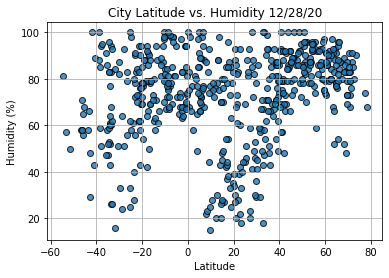

In [61]:
# Build the scatter plot for latitude vs humidity.

plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig2.png")

# Show plot. 
plt.show()

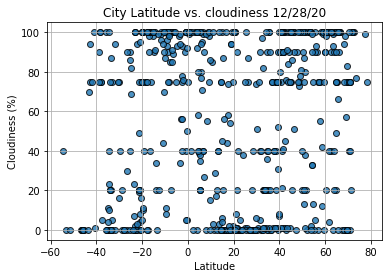

In [62]:
# Build the scatter plot for latitude vs cloudiness.

plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig3.png")

# Show plot. 
plt.show()

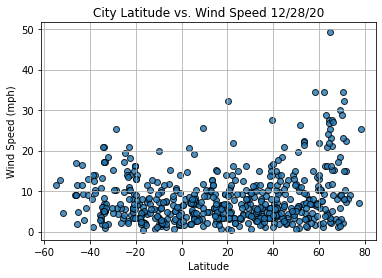

In [63]:
# Build the scatter plot for latitude vs wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig4.png")

# Show plot. 
plt.show()

In [80]:
# Import linregress 
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data. 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept 
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r")
    #Annotate the text for the line equation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [81]:
# Create Northern and Southen Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

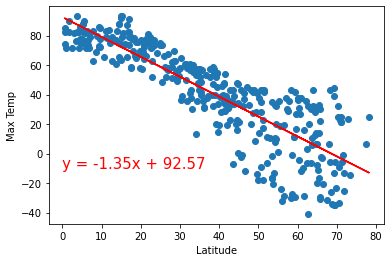

In [82]:
# Linear regression on the Northen Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function 
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (0,-10))

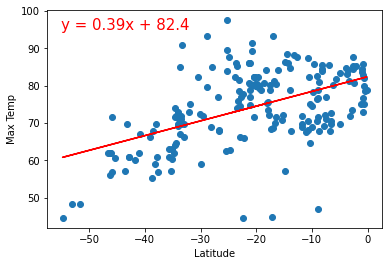

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-55,95))

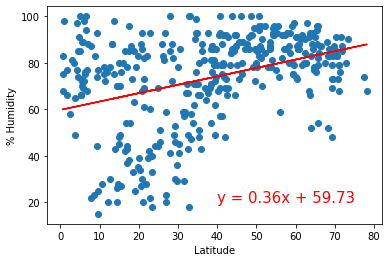

In [86]:
# Linear regression on the Northen Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function 
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northen Hemisphere \ for % Humidity', '% Humidity',(40,20))

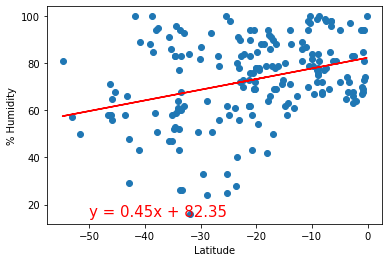

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

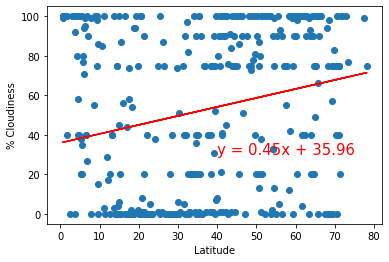

In [90]:
# Linear regression on the Northen Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function 
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northen Hemisphere \ for % Couldiness', '% Cloudiness',(40,30))

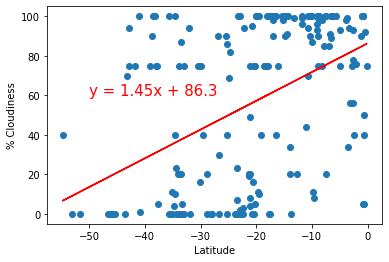

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

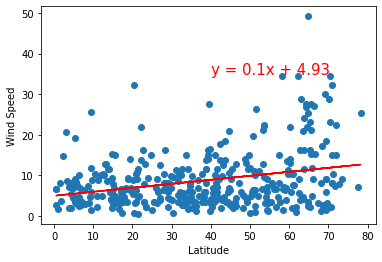

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

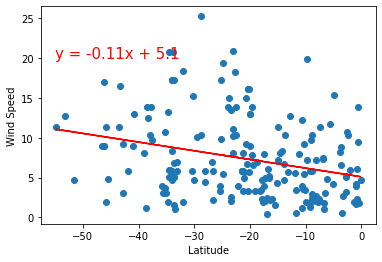

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))